In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score, roc_curve

# 1. Problem statement

In [ ]:
To predict diagnosis from other independent variables

# 2. Data Gathering

In [2]:
df=pd.read_csv(r"C:\Users\CHETAK\Desktop\daily class notes\archive (3)\KNNAlgorithmDataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# from above except unnamed column all have non null values and whole data is in numeric

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.shape

(569, 33)

In [10]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# we can directly use replace for 2 values

In [13]:
df['diagnosis'].value_counts().to_dict()

{'B': 357, 'M': 212}

In [15]:
df['diagnosis'].replace({'B': 1, 'M': 0},inplace=True)

In [16]:
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [65]:
# 4. Feature engg

# 4. Feature selection

In [18]:
# now id and  Unnamed: 32  are columns which we dont required and which will not affect on our data if they
# exist or not,so we will drop them

In [21]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [23]:
# we succefully drop both attributes

In [29]:
# as knn is distance based algo we have scalled data so first we do feature scalling with normlisation

In [30]:
y = df['diagnosis']
x = df.drop('diagnosis',axis=1)


### Feature scalling

In [31]:
normal_scaler = MinMaxScaler()
normal_arr = normal_scaler.fit_transform(x)
normal_df_x = pd.DataFrame(normal_arr,columns= x.columns)
normal_df_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# 6. Model trainnig

In [38]:
x_train,x_test,y_train,y_test=train_test_split(normal_df_x,y,test_size=0.25,random_state=10)
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
327,0.238961,0.277984,0.223205,0.128314,0.218471,0.059935,0.003622,0.027793,0.162626,0.226201,...,0.182853,0.272655,0.161014,0.083120,0.198970,0.045221,0.006176,0.096082,0.119456,0.100551
60,0.150930,0.174839,0.143459,0.071432,0.548614,0.187811,0.025398,0.064115,0.850000,0.413648,...,0.109925,0.144723,0.096867,0.045075,0.371987,0.069244,0.017316,0.088625,0.392667,0.165027
260,0.630839,0.586743,0.615783,0.485472,0.427643,0.274278,0.355904,0.463867,0.380808,0.121314,...,0.583422,0.723348,0.557249,0.407688,0.535099,0.259248,0.302556,0.583162,0.312636,0.163649
504,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.227976,0.261034,0.665657,0.949031,...,0.083600,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290361,0.460186
544,0.326045,0.371660,0.317739,0.187190,0.389546,0.252807,0.086410,0.117744,0.282828,0.356361,...,0.253291,0.339286,0.242841,0.123722,0.364723,0.171154,0.109984,0.235223,0.134831,0.195986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.711297,0.412242,0.714602,0.567762,0.484517,0.539906,0.573571,0.746024,0.385859,0.240944,...,0.701885,0.367271,0.720106,0.501819,0.384534,0.350448,0.379872,0.835739,0.231815,0.201364
320,0.154716,0.218803,0.157073,0.076649,0.482712,0.281332,0.157591,0.197068,0.344949,0.480834,...,0.119175,0.228945,0.105185,0.050433,0.455854,0.202491,0.151597,0.334845,0.205598,0.275351
527,0.253632,0.086574,0.242900,0.137858,0.337637,0.134010,0.069306,0.131561,0.317677,0.171019,...,0.202063,0.193230,0.183326,0.093320,0.383213,0.174744,0.143051,0.367698,0.304554,0.136954
125,0.325098,0.253635,0.308548,0.188844,0.317956,0.128765,0.033271,0.056710,0.279798,0.188290,...,0.268943,0.308102,0.248469,0.132889,0.294063,0.104501,0.064816,0.175395,0.157500,0.110062


In [42]:
knn_m = KNeighborsClassifier(n_neighbors=5)
knn_m.fit(x_train,y_train)


KNeighborsClassifier()

In [43]:
y_pred=knn_m.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [44]:
y_test

172    0
553    1
374    1
370    0
419    1
      ..
545    1
161    0
434    1
59     1
164    0
Name: diagnosis, Length: 143, dtype: int64

# 7. Model evalution

In [45]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix,roc_auc_score, roc_curve


### For testing data

In [48]:
y_pred_test = knn_m.predict(x_test)

con_matrix = confusion_matrix(y_test,y_pred_test)
print(f"Confusion Matrix = \n{con_matrix}")

report = classification_report(y_test,y_pred_test)
print(f"Classification Report = \n{report}")

acc = accuracy_score(y_test,y_pred_test)
print(f"Accuracy Score =\n {acc}")

Confusion Matrix = 
[[51  1]
 [ 0 91]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score =
 0.993006993006993


### For trainning data

In [50]:
y_pred_train = knn_m.predict(x_train)

con_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Confusion Matrix = \n{con_matrix}")

report = classification_report(y_train,y_pred_train)
print(f"Classification Report = \n{report}")

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score =\n {acc}")

Confusion Matrix = 
[[150  10]
 [  2 264]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       160
           1       0.96      0.99      0.98       266

    accuracy                           0.97       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.97      0.97      0.97       426

Accuracy Score =
 0.971830985915493


In [ ]:
expected acc 98%
train acc=97.18
test acc=99.30
so we have low bias and low variance
------ GENERALISE MODEL------

###  FPR, TPR, THRESH, ROC CURVE

In [53]:
y_pred_prob = knn_m.predict_proba(x_test)
y_pred_prob


array([[0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. ,

In [55]:
y_pred_prob = knn_m.predict_proba(x_test)
y_pred_prob[:,1]

array([0.2, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 1. , 1. , 0.2,
       1. , 0.4, 0. , 1. , 1. , 1. , 1. , 0.2, 0. , 1. , 1. , 0. , 0. ,
       1. , 0. , 1. , 0.6, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0.6, 0.6,
       0. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. ,
       0.8, 0.8, 1. , 0.2, 0. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       0.2, 0.4, 1. , 1. , 0. , 0.8, 1. , 1. , 0.8, 0.8, 1. , 1. , 1. ,
       1. , 0.2, 1. , 1. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. , 1. ,
       1. , 1. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 0.6,
       0. , 0. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 1. , 1. ,
       1. , 1. , 0.2, 1. , 1. , 0. , 1. , 0. , 1. , 0. , 1. , 1. , 0. ])

In [56]:
np.where(y_pred_prob[:,1] >= 0.85)

(array([  1,   2,   4,   5,   6,   7,  10,  11,  13,  16,  17,  18,  19,
         22,  23,  26,  28,  30,  31,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  44,  49,  53,  54,  57,  58,  59,  61,  64,  67,
         70,  71,  72,  73,  74,  76,  77,  80,  81,  84,  85,  88,  89,
         90,  91,  93,  94,  95,  97,  99, 102, 103, 104, 105, 108, 109,
        110, 111, 115, 119, 120, 122, 124, 125, 128, 129, 130, 131, 133,
        134, 136, 138, 140, 141], dtype=int64),)

In [59]:
fpr, tpr, thresh=roc_curve(y_test,y_pred_prob[:,1])

In [60]:
fpr

array([0.        , 0.        , 0.        , 0.01923077, 0.05769231,
       0.19230769, 1.        ])

In [61]:
tpr

array([0.        , 0.91208791, 0.96703297, 1.        , 1.        ,
       1.        , 1.        ])

In [62]:
thresh

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

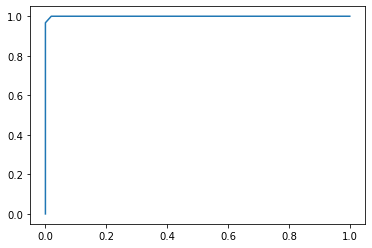

In [63]:
plt.plot(fpr,tpr)

Text(0.5, 1.0, 'ROC Curve')

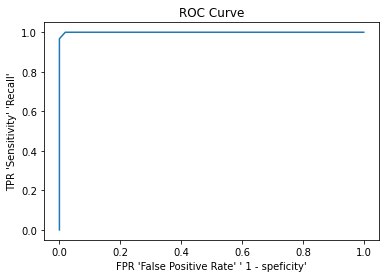

In [64]:
plt.plot(fpr,tpr)
plt.xlabel("FPR 'False Positive Rate' ' 1 - speficity'")
plt.ylabel("TPR 'Sensitivity' 'Recall'")
plt.title("ROC Curve")